In [1]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/envs')
sys.path.append('/models')
import envs.viper as vpr
import models.models as models
import models.dqn as dqn

In [3]:
import importlib
importlib.reload(vpr); importlib.reload(models); importlib.reload(dqn)

<module 'models.dqn' from 'h:\\Coding Projects\\Python Projects\\Deep-XIV-Rotation\\models\\dqn.py'>

In [4]:
sys.version

'3.12.4 | packaged by conda-forge | (main, Jun 17 2024, 10:04:44) [MSC v.1940 64 bit (AMD64)]'

In [5]:
torch.cuda.empty_cache()

In [6]:
torch.cuda.is_available()

True

In [7]:
viper_env = vpr.Viper(_sks = 798)

b123


In [8]:
agent = dqn.DQN(viper_env, _max_history=8192)

h:\Coding Projects\Python Projects\Deep-XIV-Rotation\models\models.py:425: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(self.get_positional_embeddings(_his_len, self.hidden_dim)))


Created model transnet_v2_lite with 15 features and 9 actions.
Model loaded onto cuda:0.
Layer (type:depth-idx)                        Output Shape              Param #
TransformerNetv2_Light                        [196, 9]                  3,157,504
├─Sequential: 1-1                             [196, 10, 512]            --
│    └─Linear: 2-1                            [196, 10, 512]            8,192
│    └─SELU: 2-2                              [196, 10, 512]            --
│    └─Linear: 2-3                            [196, 10, 1024]           525,312
│    └─SELU: 2-4                              [196, 10, 1024]           --
│    └─Linear: 2-5                            [196, 10, 1024]           1,049,600
│    └─BatchNorm1d: 2-6                       [196, 10, 1024]           20
│    └─SELU: 2-7                              [196, 10, 1024]           --
│    └─Linear: 2-8                            [196, 10, 2048]           2,099,200
│    └─SELU: 2-9                              [196, 

c:\Users\nickb\anaconda3\envs\deepxiv\Lib\site-packages\torch\nn\modules\transformer.py:720: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  return torch._transformer_encoder_layer_fwd(


In [9]:
action_sequence=[1, 3, 6, 8, 0, 2, 5, 0, 0, 0]
agent.env.reset_env()
_sum = 0
for a in action_sequence:
    res = agent.env.step(a, True)
    _sum+=res[0]
    print(f'({res[0]:.2f}, {res[1]:.0f}, {res[2]:.2f})')
print(_sum, _sum / len(action_sequence))

Took action: 1-reaving_fangs @ 0.000
(0.43, 200, 193.72)
Took action: 3-swiftskins_sting @ 2.450
(0.61, 300, 308.17)
Took action: 6-hindsting_strike @ 4.900
(0.83, 400, 386.76)
Took action: 8-death_rattle @ 5.600
(0.61, 280, 273.43)
Took action: 0-steel_fangs @ 6.980
(0.64, 300, 303.41)
Took action: 2-hunters_sting @ 9.060
(0.62, 300, 287.51)
Took action: 5-flanksbane_fang @ 11.140
(1.18, 550, 560.27)
Took action: 0-steel_fangs @ 13.220
(0.44, 220, 209.09)
Took action: 0-steel_fangs @ 13.920
(-0.22, 0, 0.00)
Took action: 0-steel_fangs @ 14.020
(-0.22, 0, 0.00)
4.908444444444445 0.4908444444444445


In [10]:
agent.reset_environment()

In [18]:
agent.train(gamma=0.20, num_epochs=100, session_limit=200)

Epoch 686 Loss: 9.67e-05 E_0: 0.23 E_1: 0.00 G: 0.20 Rewards: 14.1 Eval Rewards: 30.0[0.60], LR: 4.5e-05 SKS: 768
Epoch 687 Loss: 9.65e-05 E_0: 0.23 E_1: 0.00 G: 0.20 Rewards: -0.4 Eval Rewards: 30.0[0.60], LR: 4.5e-05 SKS: 822
Epoch 688 Loss: 9.61e-05 E_0: 0.23 E_1: 0.00 G: 0.20 Rewards: 9.0 Eval Rewards: 30.0[0.60], LR: 4.5e-05 SKS: 822
Epoch 689 Loss: 9.60e-05 E_0: 0.23 E_1: 0.00 G: 0.20 Rewards: 9.5 Eval Rewards: 30.0[0.60], LR: 4.5e-05 SKS: 420
Epoch 690 Loss: 9.72e-05 E_0: 0.23 E_1: 0.00 G: 0.20 Rewards: 10.9 Eval Rewards: 30.0[0.60], LR: 4.5e-05 SKS: 582
Epoch 691 Loss: 9.47e-05 E_0: 0.23 E_1: 0.00 G: 0.20 Rewards: 2.7 Eval Rewards: 30.9[0.62], LR: 4.5e-05 SKS: 822
Epoch 692 Loss: 9.50e-05 E_0: 0.23 E_1: 0.00 G: 0.20 Rewards: 0.2 Eval Rewards: 30.0[0.60], LR: 4.5e-05 SKS: 528
Epoch 693 Loss: 9.55e-05 E_0: 0.24 E_1: 0.00 G: 0.20 Rewards: 2.4 Eval Rewards: 30.0[0.60], LR: 4.5e-05 SKS: 420
Epoch 694 Loss: 9.57e-05 E_0: 0.24 E_1: 0.00 G: 0.20 Rewards: 21.1 Eval Rewards: 30.9[0.62], 

In [25]:
agent.load_checkpoint(f'./checkpoints/_{agent.model_name}_last.pth')

Checkpoint loaded - Epoch: 785 sks: 822


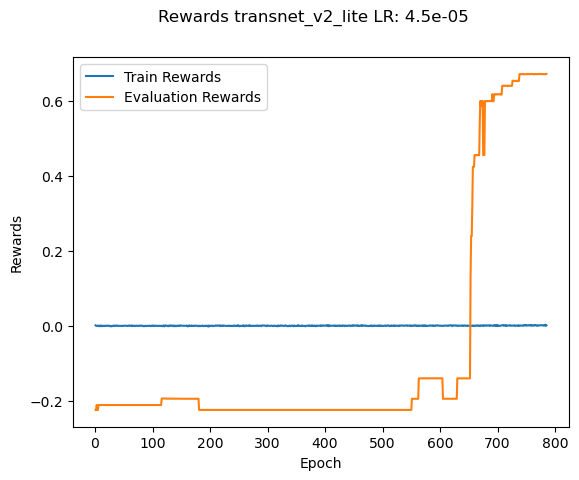

In [20]:
history_x = agent.training_history_x
history_y = agent.training_history_y
fig, ax = plt.subplots()
fig.suptitle(f'Rewards {agent.model_name} LR: {agent.lr:.1e}')
ax.plot(history_x, history_y)
ax.legend(['Train Rewards', 'Evaluation Rewards'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Rewards')
plt.savefig('rewards_graph.png', bbox_inches='tight')
plt.show()

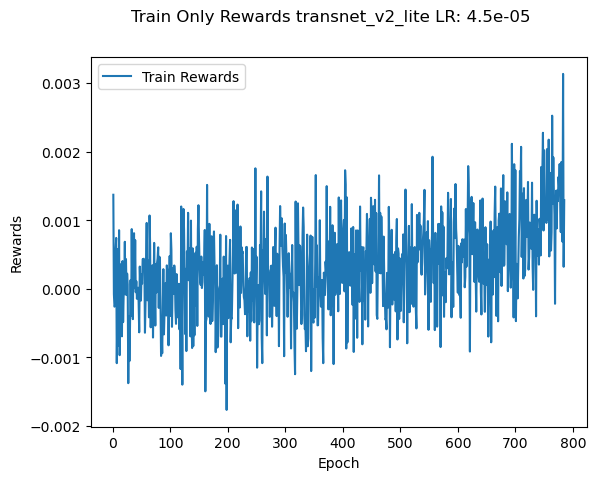

In [21]:
history_x = agent.training_history_x
history_y = agent.training_history_y
fig, ax = plt.subplots()
fig.suptitle(f'Train Only Rewards {agent.model_name} LR: {agent.lr:.1e}')
ax.plot(np.array(history_x)[:, 0], np.array(history_y)[:, 0])
ax.legend(['Train Rewards'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Rewards')
plt.savefig('rewards_graph_training.png', bbox_inches='tight')
plt.show()

In [22]:
viper_env.compute_gcd(2.5, 798, 15)

2.08

In [23]:
agent.load_checkpoint(f'./checkpoints/_{agent.model_name}_best.pth')

Checkpoint loaded - Epoch: 743 sks: 822


In [26]:
# 2.12, 2.11, 2.10, 2.09, 2.08
#[420, 528, 582, 768, 822]
agent.test(num_steps=50)

tensor([2.4500, 4.0816, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000])
Testing at sks: 822
Took action: 1-reaving_fangs @ 0.000
(0.43, 200, 203.15)
Took action: 2-hunters_sting @ 2.450
(0.61, 300, 292.17)
Took action: 4-flanksting_strike @ 4.900
(0.92, 440, 449.72)
Took action: 1-reaving_fangs @ 7.350
(0.43, 220, 214.84)
Took action: 2-hunters_sting @ 9.800
(0.68, 330, 314.58)
Took action: 4-flanksting_strike @ 12.250
(0.92, 440, 426.26)
Took action: 1-reaving_fangs @ 14.700
(0.43, 220, 213.87)
Took action: 2-hunters_sting @ 17.150
(0.68, 330, 330.29)
Took action: 4-flanksting_strike @ 19.600
(0.92, 440, 433.53)
Took action: 1-reaving_fangs @ 22.050
(0.43, 220, 224.61)
Took action: 2-hunters_sting @ 24.500
(0.68, 330, 326.81)
Took action: 4-flanksting_strike @ 26.950
(0.92, 440, 429.84)
Took action: 1-reaving_fangs @ 29.400
(0.43, 220, 219.14)
Took action: 2-hunters_sting @ 31.850
(0.68, 330, 330.21)
Took action: 4-flank

(33.62777777777777, 0.6725555555555555)

terraform aws
kubernites
helm?
look into

In [18]:
unenc = ""
for i in range(10000):
    if np.random.random() > 0.5:
        unenc += '1'
    else:
        unenc += '0'
unenc = format(int(unenc, 2), 'b')
print(len(unenc), unenc)

9998 10001010000111000000001001101110010001110001110001000110010110100010111000000101111111110010000001001101101101110101100111100111001110110001111000100011101010010110000010111111011010000011101111111110101010011000000110001110000110110010010111100100111000001110001000000001000100111000001100111000000100100101010001001110000001111100010001011001111011111101011110110110001111011101101011000000010000110011001000111000100000110001101111000100111110001000000111101110011100111011001000010100111101110101001000111111000111000010011000001000001011011000101001101101100101001000111110111011100101110100110110100000000001001000010101111001000111001110011011110101010010011110110001000110001101111010101111101001000011111111001100100101011001110001100010110011001011001011111101000001001000010110000011000000000000110110101101100110001111000001100000111111011111100010011010101110100111000000001000001101010111011110101011000011111101111111111111001010100000001000000110011010111001001110110011110100000

In [19]:
import zlib
enc_ = zlib.compress(unenc.encode())
print(len(enc_), enc_)
print(len(enc_.hex()))
print(len(enc_)+len(enc_.hex()))

1661 b'x\x9cm\x94\x89\x95\xdbP\x0c\x03["\xfbo.\x89-`\x86r6y\xbe\xa4O\xe2\xd4\xce\xcc\xfe\xfd\xf7\xefm?o\x9f\x8f\xff\xbe}\x7f\xd8^y^?\x9f>\x87\xbe\xe7\x96\x83\x9f\x8f\xdf\xbf\xef\x8d\x1a\x95\x81\xfb=\xbd\xcf\xeb\xf7%\xf3Y\xb0_T\xcf%Fgk\xcee]\xee\xcfV\x00?\xbb3-\x1f\x97)\xc5\xfa,\xf7\xd51\xbbg\xc6\xfb\xaeYC\x87\x1f\xd0\xb6\x12pi*F7?G\x8f\xe8\xa6#\x89\xbc\xd2C\xaf\xa6;\xb1\x97\xad\xc3|\xfb*\xf5P\xfcY|L|M\x186?\xf3s\xeb\xf4\xcfH\x08\x87\xe1\xce1\xb1p\x95\xb7{\xd3fU\xe5\xcf\xa0zT\x83\xc2\xa1\xd7\x0bv\t\x13\x08\xa58\x04p+c\xe2\x05\xaaU\x0e\x99\x14\xb4\'.r\xb5\x97a\xf63K\x8dBU\xe5<\x11k&\t\xa0\xe1+iJ \xfdm[\x04\xfe\x95\xe4\xa9\xbf\xd3\x1fjF\xa4\x97\xe0\r\x82\x80\xb8\xb7\rd\xedL\xdc\x98GE$\x08}Y\xed=D\tW\xb3L\xe4\x1a\xba\xd7S&\xf2\x0f\xfa\x84\x90`2\x998\x99\xa7\xe4\x87\x89U%\xe3R\xfe\x94\xcb-:>\x1e\x9f\xd0\xa8\x8c\x1d\rlpB(\x9fz\xcb\xce\x88\xb5\x81,k\xc9\xa8\xfd;IU\xf7\xc6`\xe3W\\\x1b\xc0q\xb5.\x92A\xce\x17\xf1}\xaf\xa2Tz\x8a\xd7\x01\x1d\xf02\x8cgD \xad\x95\x035\xfc2c:\xb5\xde\x1et\x14>\xef\x9

In [20]:
zlib.decompress(enc_.fromhex(enc_.hex()))

b'10001010000111000000001001101110010001110001110001000110010110100010111000000101111111110010000001001101101101110101100111100111001110110001111000100011101010010110000010111111011010000011101111111110101010011000000110001110000110110010010111100100111000001110001000000001000100111000001100111000000100100101010001001110000001111100010001011001111011111101011110110110001111011101101011000000010000110011001000111000100000110001101111000100111110001000000111101110011100111011001000010100111101110101001000111111000111000010011000001000001011011000101001101101100101001000111110111011100101110100110110100000000001001000010101111001000111001110011011110101010010011110110001000110001101111010101111101001000011111111001100100101011001110001100010110011001011001011111101000001001000010110000011000000000000110110101101100110001111000001100000111111011111100010011010101110100111000000001000001101010111011110101011000011111101111111111111001010100000001000000110011010111001001110110011110100000001